In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Lessons learned
* Make notes on classic EDA stuff
 * grouping and aggregating
 * summary statistics
 * basic plots
 * correlations

How to improve the data
* good column names from the start
* no unnecessary whitespace
* sensible group names

# Diagnostic plots

In [21]:
log = pd.read_csv('log_4_6_20180828_14_05_29.csv', sep=',')

### Accept + move type statistics

In [22]:
log['accept'].value_counts()

0.0    3442236
1.0     396151
Name: accept, dtype: int64

In [23]:
log['type'].value_counts()

D    1335261
M    1333552
B    1331187
Name: type, dtype: int64

In [24]:
log.groupby('accept')['type'].value_counts()

accept  type
0.0     M       1213739
        D       1184878
        B       1043619
1.0     B        150551
        D        150383
        M         95217
Name: type, dtype: int64

### Convergence

In [25]:
log['time'] = log['time'].replace(math.nan,'',regex=True)
log['time'] = pd.to_numeric(log['time'])

In [30]:
block_length = 40000
groupby_blocks = np.repeat(range(int(len(log)/block_length)),block_length)
groupby_blocks = np.array([0] + list(groupby_blocks+1))[0:-1]

In [31]:
groupedlog = log.groupby([groupby_blocks, 'type'])['accept'].sum().reset_index()

In [32]:
groupedmeanlog = log.groupby([groupby_blocks])['energy','no_act_vrt','time'].mean().reset_index()

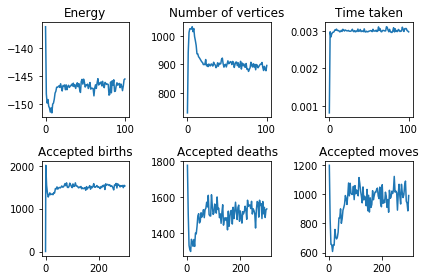

In [33]:

plt.subplot(2,3,1)
plt.title('Energy')
groupedmeanlog['energy'].plot()

plt.subplot(2,3,2)
plt.title('Number of vertices')
groupedmeanlog['no_act_vrt'].plot()

plt.subplot(2,3,3)
plt.title('Time taken')
groupedmeanlog['time'].plot()

plt.subplot(2,3,4)
plt.title('Accepted births')
groupedlog[groupedlog['type'] == 'B']['accept'].plot()

plt.subplot(2,3,5)
plt.title('Accepted deaths')
groupedlog[groupedlog['type'] == 'D']['accept'].plot()

plt.subplot(2,3,6)
plt.title('Accepted moves')
groupedlog[groupedlog['type'] == 'M']['accept'].plot()


plt.tight_layout()
# plt.show()

plt.savefig('foo.pdf')

In [34]:
log['energy'] - log['energy_after']

0            0.089
1         -135.178
2         -135.178
3         -135.178
4         -135.178
5            0.130
6         -135.308
7         -135.308
8            0.065
9         -135.373
10        -135.373
11        -135.373
12           0.088
13        -135.461
14          -0.035
15        -135.426
16           0.076
17        -135.426
18           0.080
19        -135.506
20           0.081
21        -135.506
22           0.072
23           0.080
24        -135.658
25        -135.658
26        -135.658
27        -135.658
28        -135.658
29           0.084
            ...   
3999970        NaN
3999971   -145.097
3999972   -145.097
3999973   -145.097
3999974   -145.097
3999975   -145.097
3999976   -145.097
3999977   -145.097
3999978   -145.097
3999979   -145.097
3999980   -145.097
3999981   -145.097
3999982   -145.097
3999983   -145.097
3999984   -145.097
3999985   -145.097
3999986   -145.097
3999987   -145.097
3999988   -145.097
3999989   -145.097
3999990   -145.097
3999991   -1

### Checking if the energy does not move by itself

In [89]:
lognona = log[~log.isnull().any(axis=1)]
logshift = lognona.assign(shiftenergy = lognona['energy'].shift(-1))

In [90]:
logshift[(logshift['shiftenergy'] - logshift['energy'] != 0) & (logshift['accept'] != 1)]

,step_no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time,shiftenergy
1999999,2000000,B,0.260079 0.576914 0.170576 0.0041291,,145.211,-1.0,0.762074,0.511364,0.0,6142.0,871.0,0.002197,NaN


# Cell data distributions

In [35]:
cell_data = pd.read_csv('cell_data_4_6_20180828_14_04_21.txt', sep=';')

In [36]:
cell_data

,epsilon,alpha,theta,z,max_weight,tetra_volume,tetra_circum,face_surf,edge_length,point_weight,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
0,0.01,0.1,1,500,0.01,"[2.54621e-05, 0.000108291, 0.000123248, 8.111e...","[0.0649599, 0.0856838, 0.0771731, 0.0643574, 0...","[0.0106917, 0.00687821, 0.00780698, 0.00872971...","[0.111111, 0.157135, 0.157135, 0.117269, 0.110...","[0.00221679, 0.00175527, 4.2075e-05, 0.0016294...","[19, 15, 12, 22, 15, 17, 18, 15, 16, 17, 19, 1...",5480,905,165,0.015278,0.000251,0.099998,2.77821,197.429,12.1123


In [37]:
cell_data.tetra_volume[0]

'[2.54621e-05, 0.000108291, 0.000123248, 8.111e-05, 0.000349079, 7.77429e-05, 0.000221392, 0.000127352, 0.000150699, 0.000187511, 0.000245719, 0.000292211, 0.000129371, 0.000196061, 0.000276317, 0.000222611, 0.000160714, 0.000193766, 0.000123613, 0.000156617, 0.000189612, 0.000169051, 0.000257838, 0.00016124, 0.000361644, 9.94463e-05, 0.000121908, 7.37182e-05, 0.000182682, 0.000212061, 6.12996e-05, 0.000196043, 0.000152855, 0.00014661, 0.000100446, 4.90568e-05, 9.89957e-05, 0.000173159, 0.000119119, 0.000163288, 0.000120186, 0.000261136, 0.000170635, 0.000106027, 0.000169716, 0.00014127, 0.000182956, 5.61268e-05, 0.000265037, 0.000149776, 0.000275707, 5.11486e-05, 0.000286289, 0.000140579, 0.000122803, 0.00014542, 0.000136219, 5.48719e-05, 0.000300677, 0.000171191, 0.000179998, 0.000123936, 0.00030946, 0.000164986, 0.00011221, 0.000200276, 0.000226758, 9.28778e-05, 0.000213153, 0.000333651, 0.000267231, 7.97859e-05, 0.000269749, 0.000248104, 0.00019705, 0.000115234, 0.000180237, 0.0002

In [38]:
def listify(string):
        strlist = string[1:-2].replace(' ','').split(',')[:-1]
        result = [float(num) for num in strlist]
        return(result)

In [39]:
volumes = listify(cell_data.tetra_volume[0])

In [40]:
print(np.mean(volumes), np.std(volumes))

0.000183655048080292 9.551807508731556e-05


In [41]:
bins = np.linspace(0,0.0005,30)

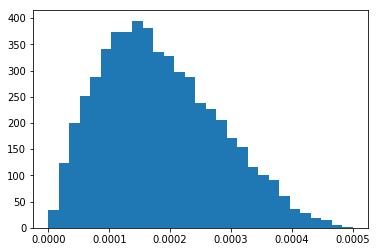

In [42]:
plt.hist(volumes,bins)
plt.show()

---

In [43]:
cell_data_neg = pd.read_csv('cell_data_4_6_20180828_14_05_29.txt', sep=';')

In [44]:
cell_data_neg

,epsilon,alpha,theta,z,max_weight,tetra_volume,tetra_circum,face_surf,edge_length,point_weight,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
0,0.01,0.1,-1,500,0.01,"[0.00015024, 0.000127212, 0.000209719, 0.00020...","[0.0761005, 0.0869228, 0.0880301, 0.0901725, 0...","[0.00404576, 0.00787732, 0.00487116, 0.0055964...","[0.157135, 0.0719022, 0.136075, 0.13987, 0.140...","[0.000922327, 0.00338297, 0.000808751, 0.00061...","[16, 19, 13, 18, 17, 13, 14, 13, 15, 16, 16, 1...",5494,896,158,0.020919,0.000626,0.099999,0.12551,160.129,11.0086


In [57]:
len(listify(cell_data_neg.tetra_circum[0]))

5494

In [45]:
volumes_neg = listify(cell_data_neg.tetra_volume[0])

In [55]:
len(volumes)

5480

In [46]:
print(np.mean(volumes_neg), np.std(volumes_neg))

0.00018388480715507822 9.296292133219678e-05


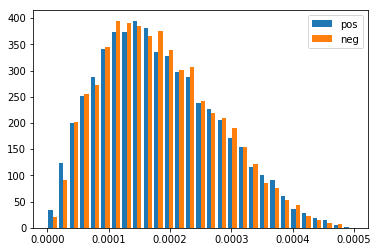

In [47]:
plt.hist([volumes,volumes_neg],bins, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

In [48]:
surf = listify(cell_data.face_surf[0])
surf_neg = listify(cell_data_neg.face_surf[0])

In [49]:
bins_surf = np.linspace(0.0004,0.013,30)

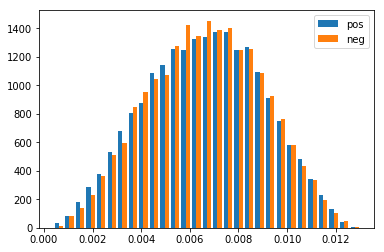

In [50]:
plt.hist([surf,surf_neg],bins_surf, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

In [51]:
length = listify(cell_data.edge_length[0])
length_neg = listify(cell_data_neg.edge_length[0])

In [58]:
bins_length = np.linspace(0.01,0.2,30)

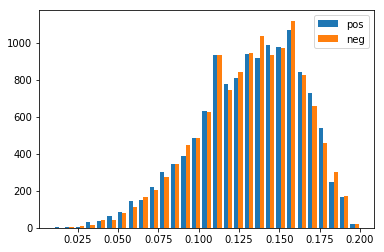

In [59]:
plt.hist([length,length_neg],bins_length, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()